# Overfitting and the bias-variance trade-off

##### Libraries

In [2]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as ss

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Goals of this lecture
 
- Model complexity and **overfitting**. 
- Introducing the **bias-variance trade-off**. 
   - Flexibility vs. interpretability.
- Dealing with overfitting: **cross-validation** and more.

## A question of complexity

Statistical models range considerably in their **complexity**.

- A *linear model* with one predictor is very simple.  
- A *neural network* with 100B parameters is very complex.

The *complexity* of a model affects how well it can fit a particular dataset––but also how likely it is to **overfit**.

### The problem of overfitting

> [**Overfitting**](https://en.wikipedia.org/wiki/Overfitting) refers to building a model that fits *too closely* to a given dataset, and which will likely fail to **generalize** or **predict** unseen data.

Breaking it down:

- "Fitting": finding the parameters $\beta_0, \beta_1, ... \beta_n$ for a model, using some *dataset*.
  - This will always involve some **error**, $\epsilon$.
- "Over": relying too closely on observations in a given dataset, i.e., "fitting to noise".
  - Every dataset has **irreducible error** that doesn't generalize across samples.

### Making the connection: samples vs. populations

- Any given dataset $d_i$ is a **sample** of some larger **population**. 
   - There are many possible samples, $d_1, d_2, ..., d_n$. 
- As we know, samples have sampling error.
- The job of a model is to recover the function $f$ with parameters $\beta_0, \beta_1, ... \beta_n$ that **best describes** $d_i$.  

Ideally, our model should **fit** $d_i$ as well as it can, but not so closely that it fails to generalize to other datasets, e.g., $d_j$.


### Review: overfitting in action

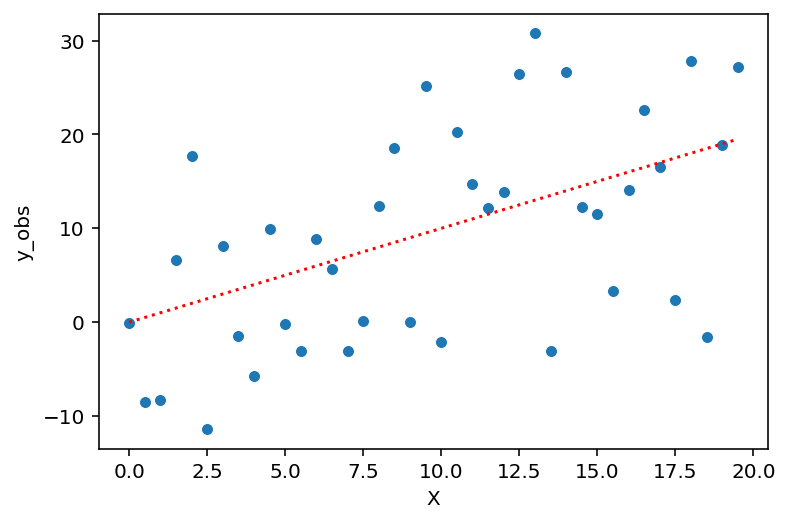

In [4]:
X = np.arange(0, 20, .5)
y = X
err = np.random.normal(scale = 8, size = len(X))
df = pd.DataFrame({'X': X, 'y_true': y, 'y_obs': y + err})
sns.scatterplot(data = df, x = "X", y = "y_obs")
plt.plot(X, y, linestyle = "dotted", color = "red")

#### Fitting a complex polynomial

Now, let's fit a very **complex** polynomial to these data––even though we know the "true" relationship is linear (albeit noisy).

**Note**: Try regenerating the *error* $\epsilon$ and see how much the fit function changes!

In [5]:
### Very complex polynomial
mod_p10 = smf.ols(data = df, formula = "y_obs ~ X + I(X**2) + I(X**3) + I(X**4) + I(X**5) + I(X**6)  + I(X**7)  + I(X**8)  + I(X**9)  + I(X**10)").fit()

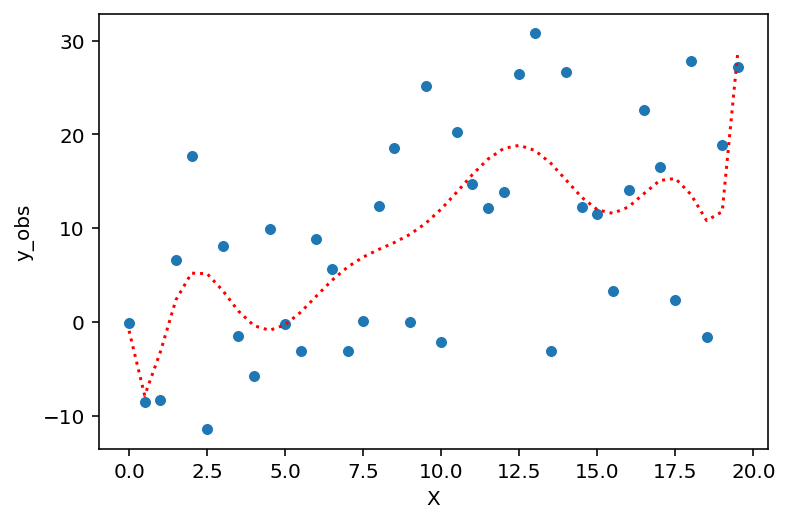

In [6]:
### Now we have a "better" fit––but it doesn't really reflect the true relationship.
sns.scatterplot(data = df, x = "X", y = "y_obs")
plt.plot(X, mod_p10.predict(), linestyle = "dotted", color = "red")

### The *bias-variance trade-off*

In general, statistical models display a **trade-off** between their:

- **Bias**: high "bias" means a model is not very flexible.  
  - E.g., linear regression is a very *biased* model, so it cannot fit non-linear relationships. 
- **Variance**: high "variance" means a model is more likely to overfit. 
  - E.g., polynomial regression is very flexible, but it's more likely to fit to noise––exhibiting poor **generalization** across samples.
  

## Bias, variance, and the bed of Procrustes

> Imagine you're a weary traveler walking from Athens to Eleusis. Along the way, you encounter a smith named [Procrustes](https://en.wikipedia.org/wiki/Procrustes), who invites you to stay the night in his home––he has a spare bed.

> There's just one catch: if you don't fit the bed exactly--if you're too long, or too short--he'll have to make you fit. That could mean cutting off your legs (if you're too long) or using a hammer to stretch you out (if you're too short). The important thing is that you fit the bed exactly.

[See also: tutorial in R](https://seantrott.github.io/procrustean_models/#Introduction).

### Procrustean models: the problem of high bias

The term **"Procrustean"** refers to adopting a "one-size-fits-all" mentality. 

This is a good description of the problem of **model bias**:

> "Bias" refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model.

[Definition from *Introduction to Statistical Learning*](https://www.statlearning.com/).

#### Check-in

What would be an example of a model with **high bias**?

#### Linear regression has high bias

A classic example of a **high bias** model is linear regression.

- By "biased", we mean that linear regression has a *strong assumption* about the shape of the function $f$ it is trying to model.  
- Specifically, linear regression assumes the function is **linear**.

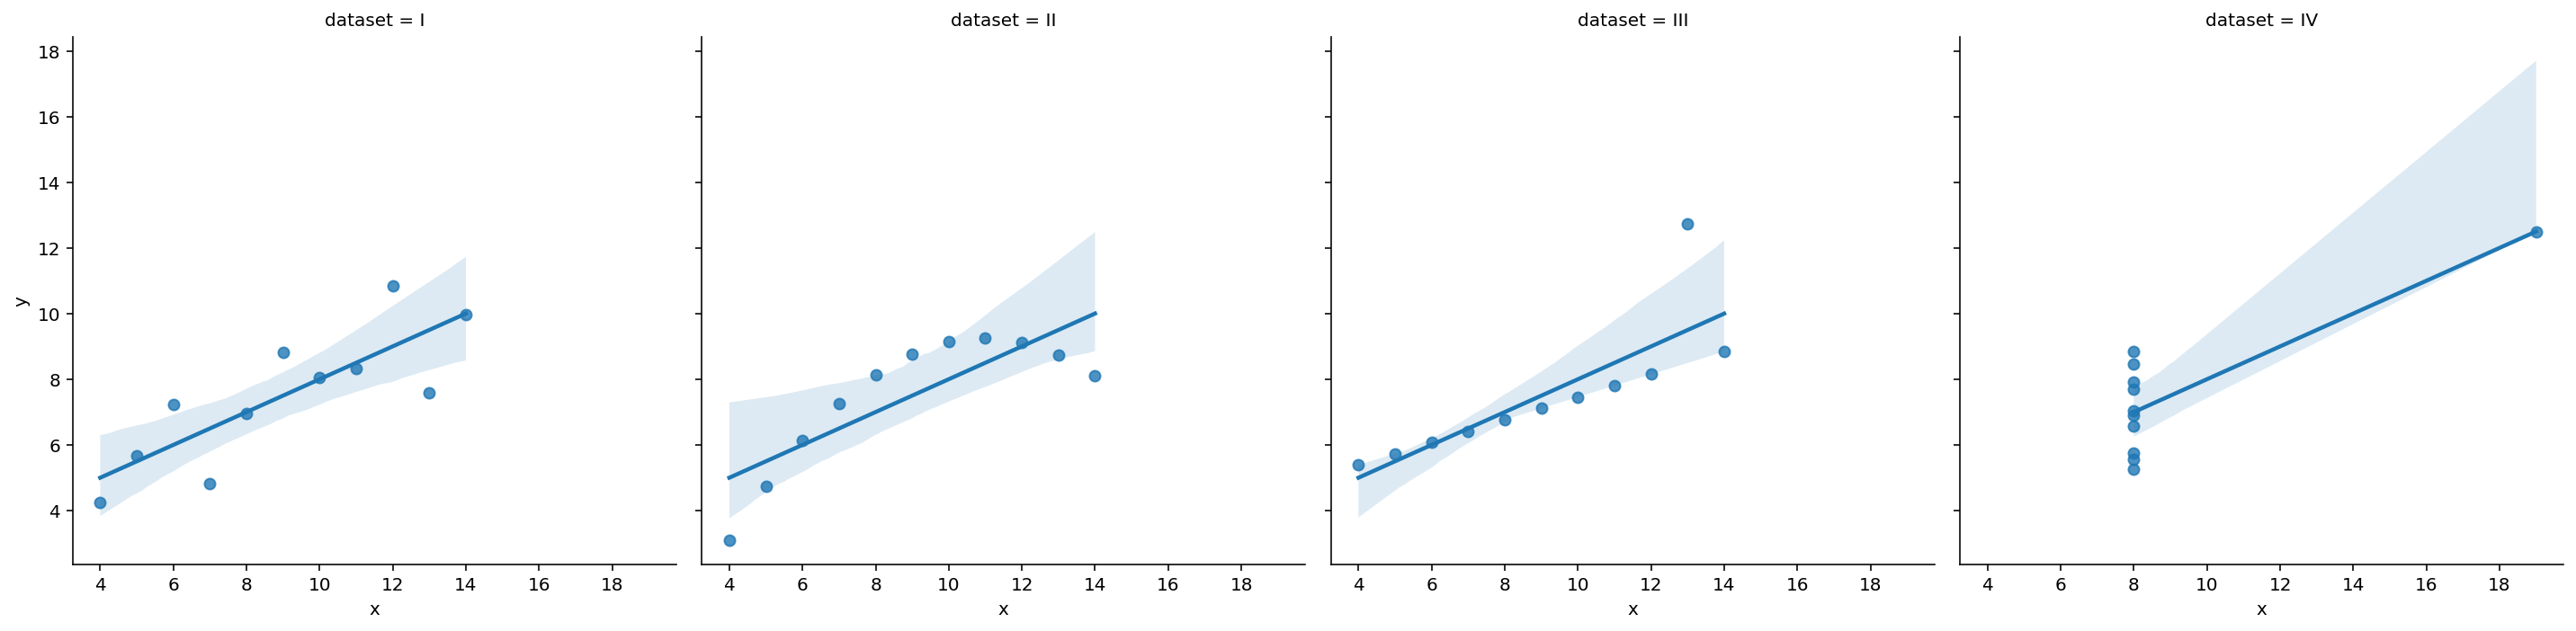

In [7]:
df_anscombe = sns.load_dataset("anscombe")
sns.lmplot(data = df_anscombe, x = "x", y = "y", col = "dataset")

#### An `Intercept`-only model also has high bias

> An `Intercept`-only model is one that predicts $Y$ using simply the mean of $Y$, i.e., $\bar{Y}$.

Such a model has extremely **high bias**––it predicts a constant value, $\bar{Y}$, regardless of $X$.

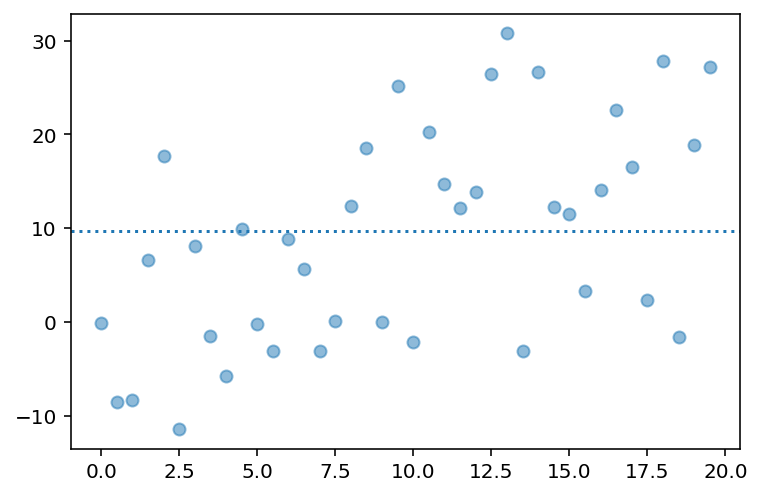

In [8]:
plt.scatter(X, y + err, alpha = .5)
plt.axhline(y.mean(), linestyle = "dotted")

#### Polynomial regression is low(er) bias

> A polynomial equation can fit a *larger* number of functions. That is, polynomial regression is more **flexible**.

This means that polynomial regression is lower bias than ordinary linear regression.

#### Polynomial regression is low(er) bias

> A polynomial equation can fit a *larger* number of functions. That is, polynomial regression is more **flexible**.

This means that polynomial regression is lower bias than ordinary linear regression.

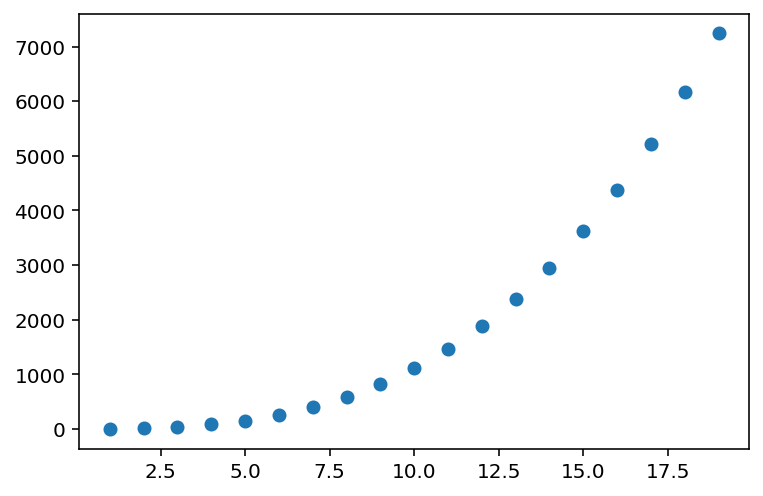

In [9]:
X = np.arange(1, 20)
y = X + X ** 2 + X **3
plt.scatter(X, y)

#### Neural networks are (usually) even lower bias

> An [artificial neural network](https://en.wikipedia.org/wiki/Artificial_neural_network) (like [ChatGPT](https://en.wikipedia.org/wiki/ChatGPT)) with sufficient parameters can in principle learn *any* differentiable function.

That is, neural networks are extremely **flexible**––they also tend to be very *complex* and *hard to interpret*.

### Variance: the other side of flexibility

A flexible model can fit more functions, but it might also exhibit more *variance*:

> "Variance" refers to the amount by which $f$ would change if we estimated it using a different training data set. Since the training data are used to fit the statistical learning method, different training data sets will result in a different $f$. But ideally the estimate for $f$ should not vary too much between training sets...In general, more flexible statistical methods have higher variance.

[Definition from *Introduction to Statistical Learning*](https://www.statlearning.com/).

#### Revisiting samples vs. populations

- Any given dataset $d_i$ is a **sample** of some larger **population**. 
   - There are many possible samples, $d_1, d_2, ..., d_n$. 
- As we know, samples have sampling error.
- The job of a model is to recover the function $f$ with parameters $\beta_0, \beta_1, ... \beta_n$ that **best describes** $d_i$.  

Ideally, our model should **fit** $d_i$ as well as it can, but not so closely that it fails to generalize to other datasets, e.g., $d_j$.


#### Making variance *concrete*

One way to think about **variance** is: *how much does a given parameter $\beta_i$ change across samples*?

- If your parameters change a lot across samples, your model has higher variance.
- If the parameters don't change much, your model has lower variance. 


### Bias-variance trade-off

> The **bias-variance trade-off** is that models with low bias tend to have higher variance, and models with low variance tend to have high bias.

- Hard to optimize for both!  
- More flexible models tend to have low bias, but high variance.  
- Less flexible models tend to have high bias, but low variance.

Let's see this trade-off in action.

#### Step 1: Define our "true" function

Let's define our true function, which we'll take to be a polynomial with degree $3$.

In [10]:
np.random.seed(10)
def f(X):
    return 2 + X * 3 + .5 * X **2 + .2 * X ** 3

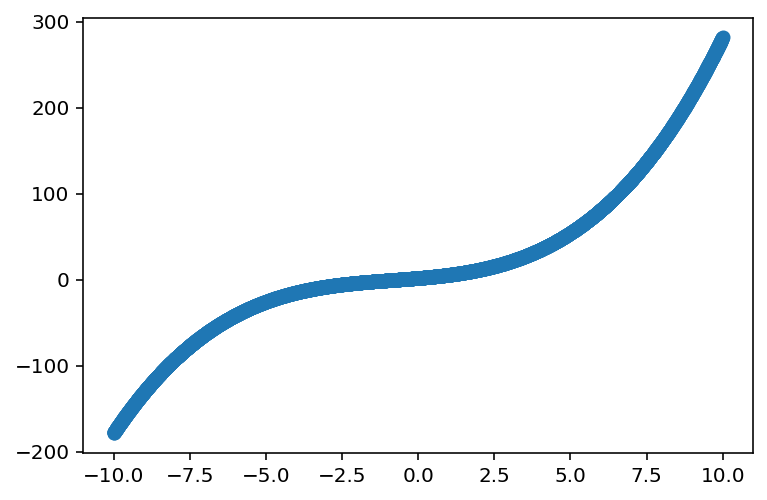

In [11]:
X = np.arange(-10, 10, .005)
plt.scatter(X, f(X))

#### Step 2: Create a "training" sample

Now, let's **sample** from this underlying function––and add normally distributed noise.

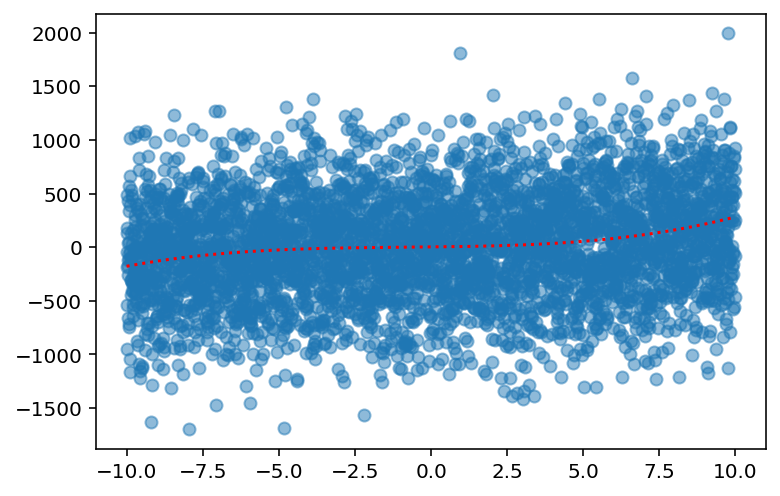

In [12]:
sample_y = f(X) + np.random.normal(scale = 500, size = len(X))
plt.scatter(X, sample_y, alpha = .5)
plt.plot(X, f(X), color = "red", linestyle = "dotted") ## true function

#### Step 3: Fit different polynomials

Now, we'll fit a range of $p$ polynomials, ranging in complexity from $p = 1$ to $p = 10$.

In [13]:
df = pd.DataFrame({'X': X, 'y_obs': sample_y})
len(df)

4000

In [14]:
formula = "y_obs ~ X"
results = []
for p in range(1, 11):
    formula = formula + " + I(X**{p})".format(p = p)
    mod = smf.ols(data = df, formula = formula).fit()
    results.append({
        'p': p,
        'r2': mod.rsquared,
        'mse': sum(mod.resid**2)/len(X)
    })
df_results = pd.DataFrame(results)

#### Step 4: Look at results

- To analyze our results, let's plot $MSE$, i.e., the **mean squared error**.  
- In general, **error decreases as we add complexity** (i.e., higher $p$).

**Can anyone think of any issues here?**

<AxesSubplot:xlabel='p', ylabel='mse'>

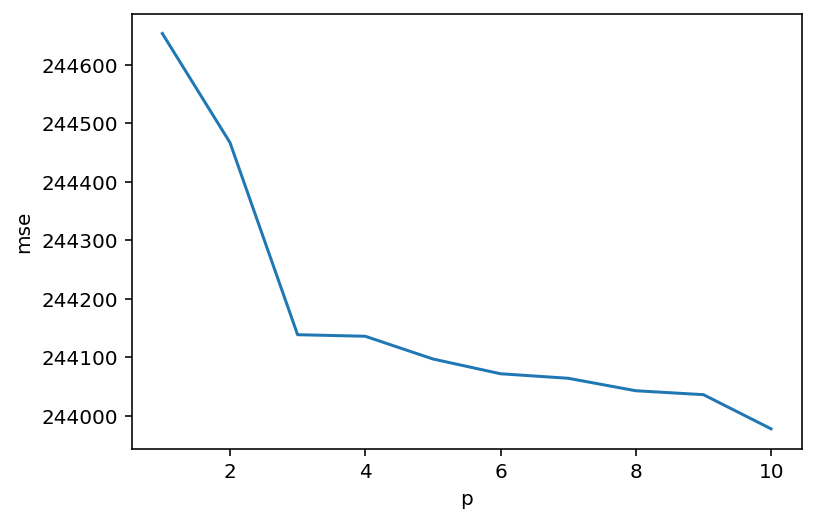

In [15]:
sns.lineplot(data = df_results, x = "p", y = "mse")

#### Step 5: Test on another "sample"

- Our model improves with higher $p$, but how well does this *generalize* to other samples?
   - I.e., is it **overfitting**.
- To test, we should create new samples with different error.
- We can **train** on the original sample, and **test** on the new sample.

In [16]:
df['y_obs2'] = f(X) + np.random.normal(scale = 500, size = len(X))

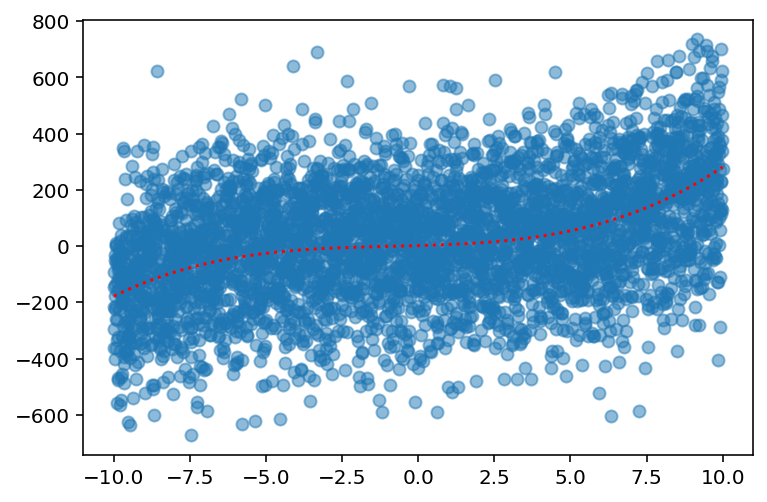

In [17]:
sample_y = f(X) + np.random.normal(scale = 200, size = len(X))
plt.scatter(X, sample_y, alpha = .5)
plt.plot(X, f(X), color = "red", linestyle = "dotted") ## true function

#### Step 6: Repeat train/test with different $p$

In [18]:
formula = "y_obs ~ X"
results = []
for p in range(1, 11):
    formula = formula + " + I(X**{p})".format(p = p)
    ## Train model
    mod = smf.ols(data = df, formula = formula).fit()
    ## Test on new sample
    new_residuals = mod.predict(df) - df['y_obs2']
    results.append({
        'p': p,
        'r2': mod.rsquared,
        'mse_train': sum(mod.resid**2)/len(X),
        'mse_test': sum(new_residuals**2)/len(X)
    })
df_results = pd.DataFrame(results)

#### Step 7: Look at results

Now, let's look at our results on the **test set**––i.e., the data the model didn't get to see. **What do we notice**?

Text(0, 0.5, 'MSE (Test Set)')

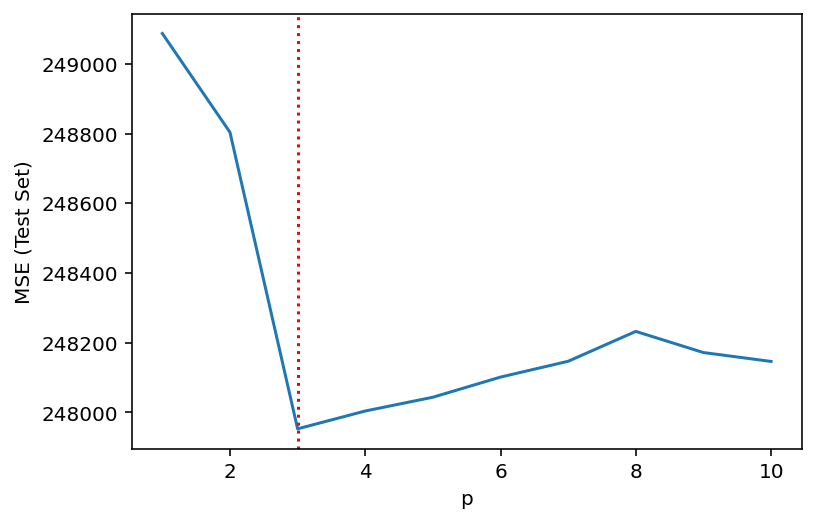

In [19]:
sns.lineplot(data = df_results, x = "p", y = "mse_test")
plt.axvline(x = 3, linestyle = "dotted", color = "red")
plt.ylabel("MSE (Test Set)")

#### Step 7: Comparing train/test error

- Train error usually decreases as $p$ increases.  
- But test error will not decrease monotonically!

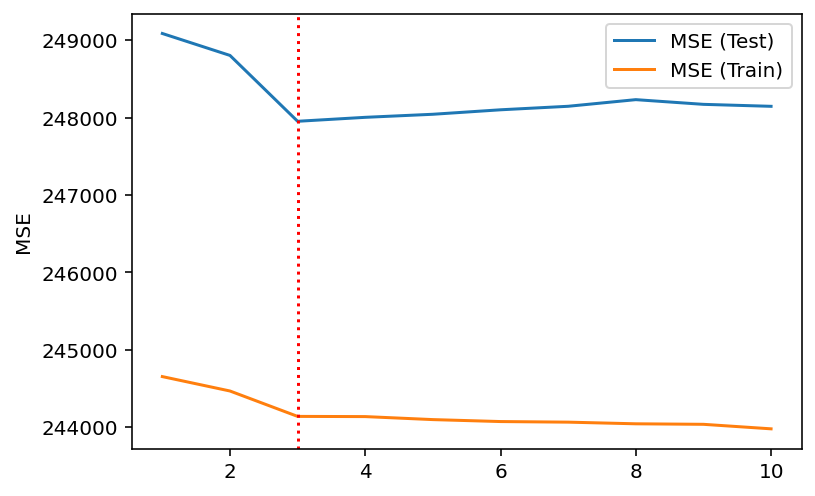

In [20]:
plt.plot(df_results['p'], df_results["mse_test"], label = "MSE (Test)")
plt.plot(df_results['p'], df_results["mse_train"], label = "MSE (Train)")
plt.axvline(x = 3, linestyle = "dotted", color = "red")
plt.ylabel("MSE")
plt.legend()

### Trade-off illustrated

- Red line = test error.
- Blue line = train error.

![title](img/bias.png)

[Screenshot from *The Elements of Statistical Learning*](https://hastie.su.domains/ElemStatLearn/).

## Cross-validation

> To avoid overfitting, researchers often use [**cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html): a technique that involves fitting a model on one portion (or "fold") of a dataset and testing the model on another portion (or "fold").

Basic intuition:

- More flexible models (higher $p$) will generally fit better on **training data**.
    - However, this is often due to **overfitting**.
- Better to test on **held-out set** (i.e., data a model hasn't seen before).

### An analogy: cross-validation in the classroom

- As a rough analogy, a teacher shouldn't give students the *exact* exam questions before the exam.  
- The students will "overfit" to those questions.  
- Instead, a teacher can give students a guide of what *kinds* of questions will be on the exam.  
- Then, the exam itself tests *conceptually similar* knowledge.

I.e., a test of **generalization**.

### Using `train_test_split`

The simplest approach is to **split** your data into two sub-portions:

- A "training" portion: used to fit the model.  
- A "testing" portion: used to test the model.

This can be done using the `train_test_split` function from the `sklearn` package.

In [21]:
from sklearn.model_selection import train_test_split
### train_test_split(df_name, ...)

#### `train_test_split` in action

To use `train_test_split`, you must specify (in addition to the dataset):

- `train_size`: what proportion of the data to use for training?  
- `test_size`: what proportion of the data to use for testing?  

You can also optionally set a `random_state`, which ensures that the `train_test_split` is **consistent**––i.e., the same split each time.

In [22]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")
df_gapminder.shape

(1704, 6)

In [23]:
df_train, df_test = train_test_split(df_gapminder, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 20)
print(df_train.shape)
print(df_test.shape)

(1192, 6)
(512, 6)


#### Check-in

How many observations (roughly) should we expect in our train/test datasets, respectively, if we used a 50/50 split on `df_gapminder`?

In [24]:
### Your code here

##### Solution

With a 50/50 split, we expect an equal number of observations in our train and test datasets.

In [25]:
df_train50, df_test50 = train_test_split(df_gapminder, 
                                     train_size = 0.5, 
                                     test_size = 0.5, 
                                     random_state = 1)
print(df_train50.shape)
print(df_test50.shape)

(852, 6)
(852, 6)


#### Comparing our train/test sets

- We can think of our train/test datasets as **samples** of a broader population––the original dataset.  
- Crucially, because we **randomly split** our data, these are **random samples**!

In [26]:
### Means/variance won't be exactly the same
print(df_train['gdp_cap'].mean())
print(df_test['gdp_cap'].mean())

7172.602156627266
7314.796046261329


In [27]:
### Neither will correlations, etc.
print(ss.pearsonr(df_train['gdp_cap'], df_train['life_exp'])[0])
print(ss.pearsonr(df_test['gdp_cap'], df_test['life_exp'])[0])

0.5810702334558102
0.5895365116149536


#### Step 1: training

To **train** a model, first **fit** it to your training set.

In [28]:
mod_train = smf.ols(data = df_train, formula = "life_exp ~ gdp_cap").fit()
mod_train.params

Intercept    54.027244
gdp_cap       0.000766
dtype: float64

Text(0, 0.5, 'Actual Life Expectancy')

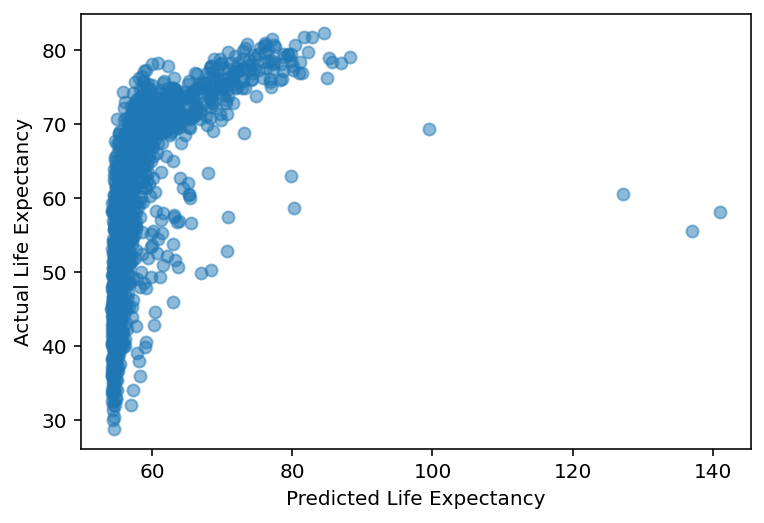

In [29]:
### Compare model predictions to real data
plt.scatter(mod_train.predict(), df_train['life_exp'], alpha = .5)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Actual Life Expectancy")

#### Step 2: testing

To **test** a model, use your *already-fit* model to generate predictions for your **test** set.

In [30]:
y_pred_test = mod_train.predict(df_test)
y_pred_test.shape

(512,)

Text(0, 0.5, 'Actual Life Expectancy (Test)')

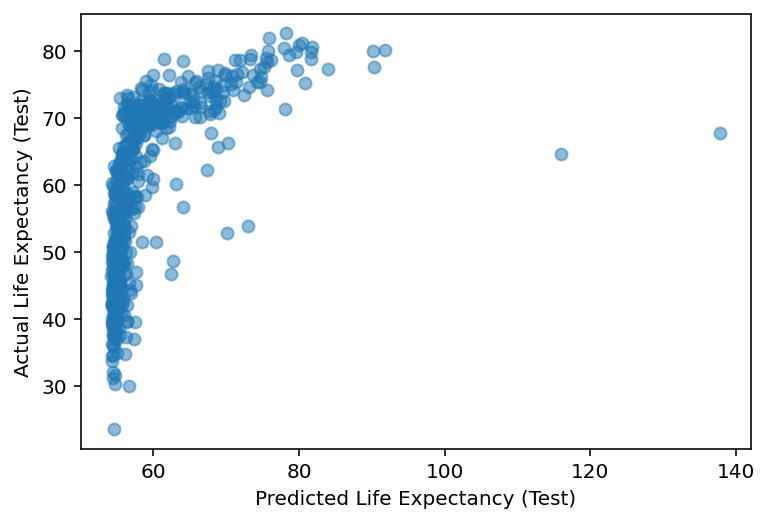

In [31]:
plt.scatter(y_pred_test, df_test['life_exp'], alpha = .5)
plt.xlabel("Predicted Life Expectancy (Test)")
plt.ylabel("Actual Life Expectancy (Test)")

#### Step 3: Compare $MSE$ for train vs. test portion

*Typically*, your prediction error should be lower on the **train set** than the **test set**.

In [32]:
mse_train = sum((mod_train.predict(df_train) - df_train['life_exp'])**2)/len(df_train)
print(mse_train)

107.82480636789772


In [33]:
mse_test = sum((mod_train.predict(df_test) - df_test['life_exp'])**2)/len(df_test)
print(mse_test)

114.8822184353271


#### Step 4: Validating across multiple splits

To check this, we can perform *many* splits with different `random_state`s, and keep track of the $MSE$ for the training/testing set each time.

In [34]:
results = []
for rs in range(1, 101):
    df_train, df_test = train_test_split(df_gapminder, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = rs)
    mod_train = smf.ols(data = df_train, formula = "life_exp ~ gdp_cap").fit()
    mse_train = sum((mod_train.predict(df_train) - df_train['life_exp'])**2)/len(df_train)
    mse_test = sum((mod_train.predict(df_test) - df_test['life_exp'])**2)/len(df_test)
    results.append({'rs': rs, 'mse_train': mse_train, 'mse_test': mse_test})

In [35]:
df_results = pd.DataFrame(results)
df_results.head(2)

,rs,mse_train,mse_test
0,1,110.149390,109.780933
1,2,103.905915,124.792988


#### Step 5: Comparing $MSE$ for train/test sets

The **mean** $MSE$ is higher for our test sets than our train sets.

In [36]:
print(df_results['mse_train'].mean())
print(df_results['mse_test'].mean())

109.3436122481434
112.67709136443473


### Leave-one-out cross-validation

> With **leave-one-out cross-validation (LOOCV)**, we select one observation as our "test" set, then train our model on the remaining data. We do this $n$ times (for each point in the dataset.

This is like doing $n$ train/test splits, where we ensure that every observation gets a shot at being the "test" observation.

![title](img/loocv.png)

[Screenshot from *The Elements of Statistical Learning*](https://hastie.su.domains/ElemStatLearn/).

#### LOOCV in Python

Unlike `train_test_split`, the `LeaveOneOut` function gives you *indices* for each item in your dataset.

In [37]:
from sklearn.model_selection import LeaveOneOut

In [38]:
loo = LeaveOneOut()
loo.get_n_splits(df_gapminder)

1704

```python
for i, (train_index, test_index) in enumerate(loo.split(df_gapminder)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
```

#### Using LOOCV

In [39]:
results = []
for i, (train_index, test_index) in enumerate(loo.split(df_gapminder)):
    df_train = df_gapminder.iloc[train_index]
    df_test = df_gapminder.iloc[test_index]
    mod_train = smf.ols(data = df_train, formula = "life_exp ~ gdp_cap").fit()
    mse_train = sum((mod_train.predict(df_train) - df_train['life_exp'])**2)/len(df_train)
    mse_test = sum((mod_train.predict(df_test) - df_test['life_exp'])**2)/len(df_test)
    results.append({'rs': rs, 'mse_train': mse_train, 'mse_test': mse_test, 'life_exp': df_test['life_exp'].iloc[0]})

In [40]:
df_results = pd.DataFrame(results)
df_results.shape ### A row for each observation

(1704, 4)

#### Evaluating results

Again, we see that $MSE$ tends to be higher on the **test** set.

In [41]:
print(df_results['mse_train'].mean())
print(df_results['mse_test'].mean())

109.93798502087066
112.04420283606598


### K-Fold Cross-validation

> With **K-fold cross-validation**, we split our data into $k$ equally-sized folds; we then randomly select fold as the "test" set and the other folds as "training" sets. We repeat this procedure $k$ times.

- When $k = 2$, this is like doing a `train_test_split` with a 50/50 split.  

#### Check-in

When $k = n$, what does k-fold cross-validation amount to?

#### When $k = n$

When $k = n$, K-fold cross-validation is the same as LOOCV!

#### Using `KFold` in Python

In [70]:
from sklearn.model_selection import KFold

In [73]:
kf = KFold(n_splits=10, random_state = 1, shuffle = True)
kf.get_n_splits(df_gapminder)

10

#### Using `KFold` on a dataset

In [74]:
results = []
for i, (train_index, test_index) in enumerate(kf.split(df_gapminder)):
    df_train = df_gapminder.iloc[train_index]
    df_test = df_gapminder.iloc[test_index]
    mod_train = smf.ols(data = df_train, formula = "life_exp ~ gdp_cap").fit()
    mse_train = sum((mod_train.predict(df_train) - df_train['life_exp'])**2)/len(df_train)
    mse_test = sum((mod_train.predict(df_test) - df_test['life_exp'])**2)/len(df_test)
    results.append({'rs': rs, 'mse_train': mse_train, 'mse_test': mse_test, 'life_exp': df_test['life_exp'].iloc[0]})

In [75]:
df_results = pd.DataFrame(results)
df_results.shape ### A row for each observation

(10, 4)

#### Evaluating results

Again, we see that $MSE$ tends to be higher on the **test** set.

In [76]:
print(df_results['mse_train'].mean())
print(df_results['mse_test'].mean())

109.84441939854291
111.77229749778971


## Conclusion

- Statistical models can be more or less **flexible**.  
- This flexibility relates to the bias-variance trade-off:
   - More flexible models: tend to be high variance, low bias.  
   - Less flexible models: tend to be low variance, high bias. 
- Ideally, we want a flexible model that *also* doesn't **overfit**.
- To account for **overfitting**, we can use **cross-validation**.